In [1]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

Automatic pdb calling has been turned OFF


In [2]:
# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym


In [3]:
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

## phase portrait

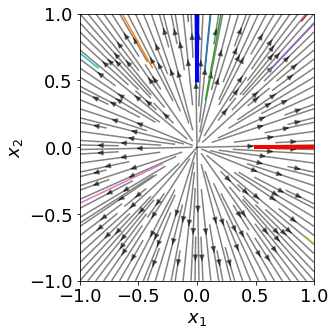

In [7]:
g = 9.81
m = 75000.0 # kg
ell = 40 # m
alpha = 0.1# friction
ut = lambda t : 0

dt = .01

def f(t,x,u):
  q, dq = x
  # u = 0
  ddq = g/ell*np.sin(q)-alpha*dq#+1/(m*ell)*u*np.cos(q)
  return np.asarray([q,dq])

plt.figure(figsize=(5,5))

# simulation time
t = 15

# phase portrait / "quiver" plot
ax = plt.subplot(1,1,1)
X, Y = np.meshgrid(np.linspace(-1,+1, 11), np.linspace(-1, +1, 11))
dX,dY = np.asarray([f(0.,(x,y),0.).flatten() for x,y in zip(X.flatten(),Y.flatten())]).T
dX,dY = dX.reshape(X.shape),dY.reshape(Y.shape)
#ax.quiver(X,Y,dX,dY)
ax.streamplot(X,Y,dX,dY,density=2.,color=(0,0,0,.5))
ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')

for _ in range(10):
  # random initial condition in [-1,+1] x [-1,+1] square
  x0 = 2*(np.random.rand(2) - .5)
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=ut)
  ax.plot(x_[:,0],x_[:,1])

t_,x_ = numerical_simulation(f,t,[.5,0],dt=dt,ut=ut)
ax.plot(x_[:,0],x_[:,1],'r',lw=4)
t_,x_ = numerical_simulation(f,t,[0,.5],dt=dt,ut=ut)
ax.plot(x_[:,0],x_[:,1],'b',lw=4)

ax.set_xlim((-1,+1))
ax.set_ylim((-1,+1))

plt.tight_layout()

In [8]:
A = np.array([[0,1],[g/ell, -alpha/ell**2]])
print('A')
print(A)
eigenvalue, _ = np.linalg.eig(A)
print('eigenvalue of A')
print(eigenvalue)

A
[[ 0.000e+00  1.000e+00]
 [ 2.453e-01 -6.250e-05]]
eigenvalue of A
[ 0.495 -0.495]


In [24]:
sym.var("k_P s")
C = k_P+1/s
P = 1/(s-1)
Gs = P*C/(1+P*C)
Gs = Gs.simplify().cancel()
Gs

(k_P*s + 1)/(k_P*s + s**2 - s + 1)